In [228]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [229]:
n=100

In [230]:
x = torch.ones(n,4) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.4094,  1.0000,  1.0000,  1.0000],
        [-0.0965,  1.0000,  1.0000,  1.0000],
        [ 0.0248,  1.0000,  1.0000,  1.0000],
        [-0.6819,  1.0000,  1.0000,  1.0000],
        [-0.3601,  1.0000,  1.0000,  1.0000]])

In [231]:
x = torch.index_select(x, 1, torch.tensor([0,0,0,2]))

In [232]:
x[:,0].apply_(lambda a: 3*a**3)
x[:,1].apply_(lambda a: -2*a**2)
x[:5]

tensor([[-2.0584e-01, -3.3520e-01, -4.0939e-01,  1.0000e+00],
        [-2.6952e-03, -1.8621e-02, -9.6492e-02,  1.0000e+00],
        [ 4.5660e-05, -1.2283e-03,  2.4782e-02,  1.0000e+00],
        [-9.5138e-01, -9.3008e-01, -6.8194e-01,  1.0000e+00],
        [-1.4007e-01, -2.5933e-01, -3.6009e-01,  1.0000e+00]])

In [233]:
a = tensor(3.,1.,2.,4.); a

tensor([3., 1., 2., 4.])

In [234]:
y = x@a + (torch.rand(n) * 6)

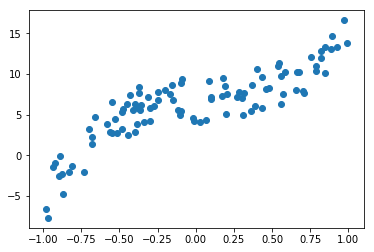

In [235]:
plt.scatter(x[:,2], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [236]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [237]:
a = tensor(-1.,1,-1,1)

In [238]:
y_hat = x@a
mse(y_hat, y)

tensor(67.8838)

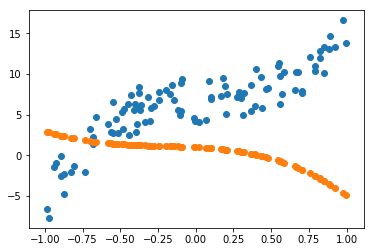

In [239]:
plt.scatter(x[:,2],y)
plt.scatter(x[:,2],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [240]:
a = tensor(-1.,1,-1,1)
parameterVector = nn.Parameter(a.clone())
a = nn.Parameter(a)
a, parameterVector

(Parameter containing:
 tensor([-1.,  1., -1.,  1.], requires_grad=True), Parameter containing:
 tensor([-1.,  1., -1.,  1.], requires_grad=True))

In [241]:
momentumFactor = 0.9;

In [242]:
def updateWithMomentum(pVector, mVector):
    y_hat = x@pVector
    loss = mse(y, y_hat)
    loss.backward()
    newMomentumVector = mVector
    with torch.no_grad():
        appliedGradient = lr * pVector.grad
        newMomentumVector = mVector * momentumFactor - appliedGradient
        pVector.add_(newMomentumVector)
        pVector.grad.zero_()
    return pVector, newMomentumVector

In [243]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

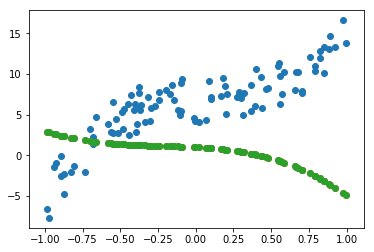

In [244]:
plt.scatter(x[:,2],y)
plt.scatter(x[:,2],x@a);
plt.scatter(x[:,2],x@parameterVector);

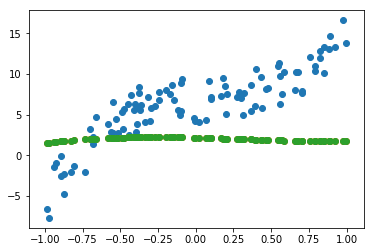

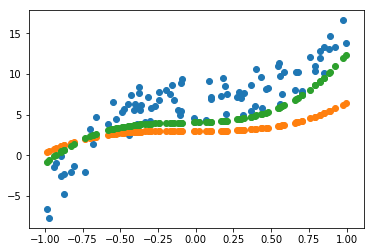

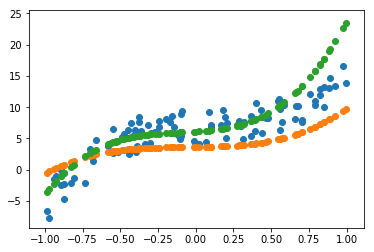

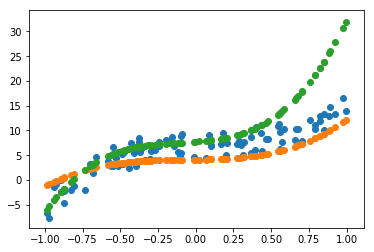

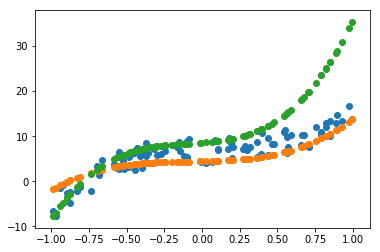

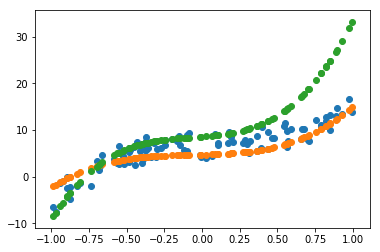

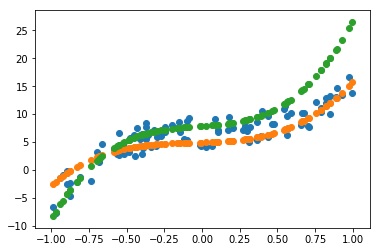

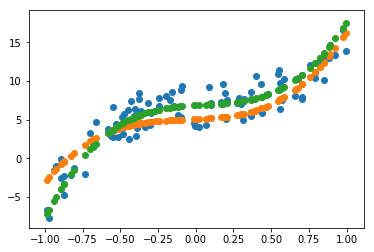

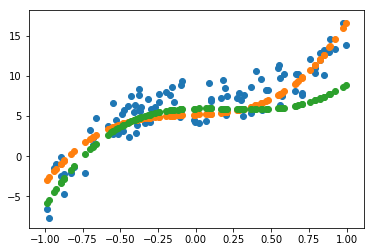

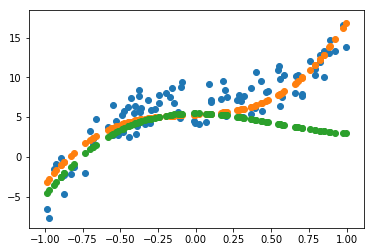

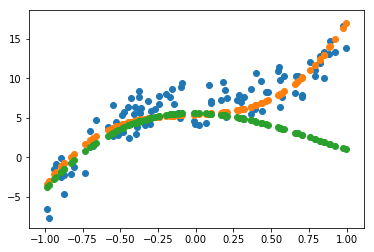

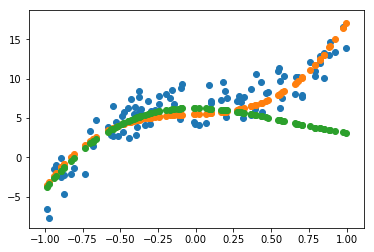

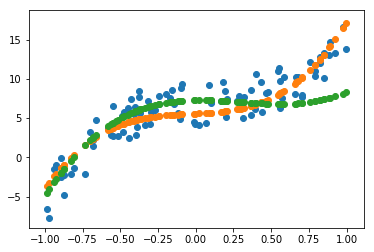

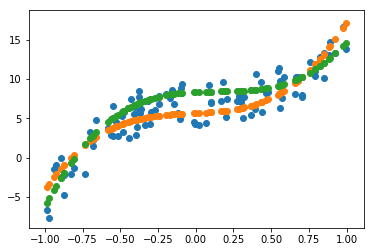

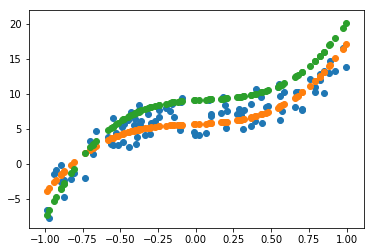

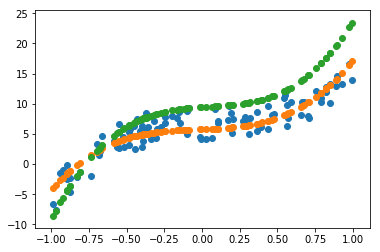

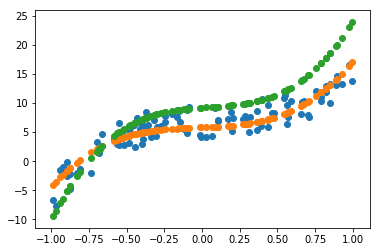

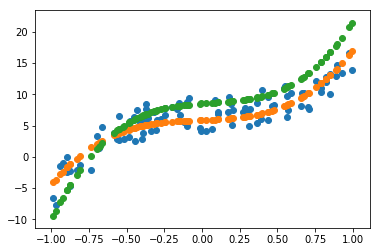

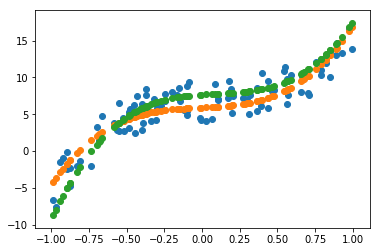

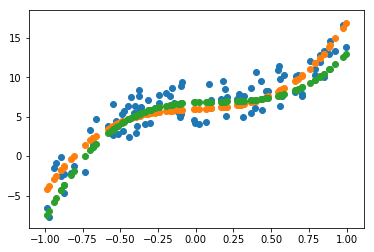

In [245]:
lr = 1e-1
momentumVector = nn.Parameter(torch.zeros(parameterVector.shape))
for t in range(20): 
    pVector, newMomentumVector = updateWithMomentum(parameterVector, momentumVector)
    parameterVector = pVector
    momentumVector = newMomentumVector
    update()
    figure = plt.figure(t)
    plt.scatter(x[:,2],y)
    plt.scatter(x[:,2],x@a);
    plt.scatter(x[:,2],x@parameterVector);
    figure.show()

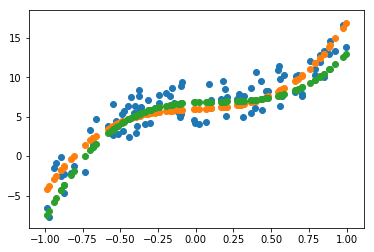

In [246]:
plt.scatter(x[:,2],y)
plt.scatter(x[:,2],x@a);
plt.scatter(x[:,2],x@parameterVector);

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.